# 1. Data Loading


In [ ]:
import pandas as pd

# Load datasets
customers_df = pd.read_csv('customers.csv')
calls_df = pd.read_csv('calls.csv')
reason_df = pd.read_csv('reasons.csv')
sentiment_df = pd.read_csv('sentiment_statistics.csv')
test_df = pd.read_csv('test.csv')

# Preview each dataframe
print(customers_df.head())
print(calls_df.head())
print(reason_df.head())
print(sentiment_df.head())



   customer_id      customer_name  elite_level_code
0   2033123310     Matthew Foster               4.0
1   8186702651      Tammy Walters               NaN
2   2416856629      Jeffery Dixon               NaN
3   1154544516      David Wilkins               2.0
4   5214456437  Elizabeth Daniels               0.0
      call_id  customer_id  agent_id call_start_datetime  \
0  4667960400   2033123310    963118     7/31/2024 23:56   
1  1122072124   8186702651    519057       8/1/2024 0:03   
2  6834291559   2416856629    158319     7/31/2024 23:59   
3  2266439882   1154544516    488324       8/1/2024 0:05   
4  1211603231   5214456437    721730       8/1/2024 0:04   

  agent_assigned_datetime call_end_datetime  \
0           8/1/2024 0:03     8/1/2024 0:34   
1           8/1/2024 0:06     8/1/2024 0:18   
2           8/1/2024 0:07     8/1/2024 0:26   
3           8/1/2024 0:10     8/1/2024 0:17   
4           8/1/2024 0:14     8/1/2024 0:23   

                                     call_tr

# 2. Data Cleaning


In [ ]:
# Drop unwanted columns
customers_df = customers_df.drop(columns=['customer_name'])
calls_df = calls_df.drop(columns=['call_transcript'])  # Dropping call transcript for analysis


In [ ]:
print(customers_df.isnull().sum())
print(calls_df.isnull().sum())
print(reason_df.isnull().sum())
print(sentiment_df.isnull().sum())

customer_id             0
elite_level_code    25767
dtype: int64
call_id                    0
customer_id                0
agent_id                   0
call_start_datetime        0
agent_assigned_datetime    0
call_end_datetime          0
dtype: int64
call_id                0
primary_call_reason    0
dtype: int64
call_id                      0
agent_id                     0
agent_tone                 217
customer_tone                0
average_sentiment          109
silence_percent_average      0
dtype: int64


# 3. Data Merging


In [ ]:
# Merge calls with reason
merged_df = pd.merge(calls_df, reason_df, on='call_id', how='left')

# Merge calls with sentiment data
merged_df = pd.merge(merged_df, sentiment_df, on='call_id', how='left')

# Merge with customer data
merged_df = pd.merge(merged_df, customers_df, on='customer_id', how='left')

# Preview the final merged dataframe
print(merged_df.head())

      call_id  customer_id  agent_id_x call_start_datetime  \
0  4667960400   2033123310      963118     7/31/2024 23:56   
1  1122072124   8186702651      519057       8/1/2024 0:03   
2  6834291559   2416856629      158319     7/31/2024 23:59   
3  2266439882   1154544516      488324       8/1/2024 0:05   
4  1211603231   5214456437      721730       8/1/2024 0:04   

  agent_assigned_datetime call_end_datetime primary_call_reason  agent_id_y  \
0           8/1/2024 0:03     8/1/2024 0:34   Voluntary  Cancel      963118   
1           8/1/2024 0:06     8/1/2024 0:18             Booking      519057   
2           8/1/2024 0:07     8/1/2024 0:26              IRROPS      158319   
3           8/1/2024 0:10     8/1/2024 0:17             Upgrade      488324   
4           8/1/2024 0:14     8/1/2024 0:23             Seating      721730   

  agent_tone customer_tone  average_sentiment  silence_percent_average  \
0    neutral         angry              -0.04                     0.39   
1   

In [ ]:
# Percentage of missing values in each column
missing_values = pd.DataFrame({
    'columns': merged_df.columns,
    'percent_missing': merged_df.isnull().mean() * 100
})

# Display missing values percentage
print(missing_values.sort_values(by='percent_missing', ascending=False))


                                         columns  percent_missing
elite_level_code                elite_level_code        35.882189
primary_call_reason          primary_call_reason         7.181451
agent_tone                            agent_tone         0.302186
average_sentiment              average_sentiment         0.151789
call_id                                  call_id         0.000000
customer_id                          customer_id         0.000000
agent_id_x                            agent_id_x         0.000000
call_start_datetime          call_start_datetime         0.000000
agent_assigned_datetime  agent_assigned_datetime         0.000000
call_end_datetime              call_end_datetime         0.000000
agent_id_y                            agent_id_y         0.000000
customer_tone                      customer_tone         0.000000
silence_percent_average  silence_percent_average         0.000000


In [ ]:
# Filling missing values
merged_df['elite_level_code'].fillna(merged_df['elite_level_code'].median(), inplace=True)  # Median for numeric columns
merged_df['primary_call_reason'].fillna('Unknown', inplace=True)  # Mode or 'Unknown' for categorical columns


<ipython-input-28-5a45e125ed22>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['elite_level_code'].fillna(merged_df['elite_level_code'].median(), inplace=True)  # Median for numeric columns
<ipython-input-28-5a45e125ed22>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [ ]:
# Convert datetime columns to datetime objects
merged_df['call_start_datetime'] = pd.to_datetime(merged_df['call_start_datetime'])
merged_df['agent_assigned_datetime'] = pd.to_datetime(merged_df['agent_assigned_datetime'])
merged_df['call_end_datetime'] = pd.to_datetime(merged_df['call_end_datetime'])

# Calculate Handle Time (AHT)
merged_df['handle_time'] = (merged_df['call_end_datetime'] - merged_df['agent_assigned_datetime']).dt.total_seconds()

# Calculate Speed to Answer (AST)
merged_df['speed_to_answer'] = (merged_df['agent_assigned_datetime'] - merged_df['call_start_datetime']).dt.total_seconds()

# Preview the data with calculated AHT and AST
print(merged_df[['call_id', 'handle_time', 'speed_to_answer']].head())


      call_id  handle_time  speed_to_answer
0  4667960400       1860.0            420.0
1  1122072124        720.0            180.0
2  6834291559       1140.0            480.0
3  2266439882        420.0            300.0
4  1211603231        540.0            600.0


# 4. Calculating AHT and AST


In [ ]:
# Calculate overall AHT and AST
total_handle_time = merged_df['handle_time'].sum()
total_calls = len(merged_df)
aht = total_handle_time / total_calls

total_wait_time = merged_df['speed_to_answer'].sum()
ast = total_wait_time / total_calls

print(f"Overall AHT: {aht:.2f} seconds")
print(f"Overall AST: {ast:.2f} seconds")


Overall AHT: 532.07 seconds
Overall AST: 437.72 seconds


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


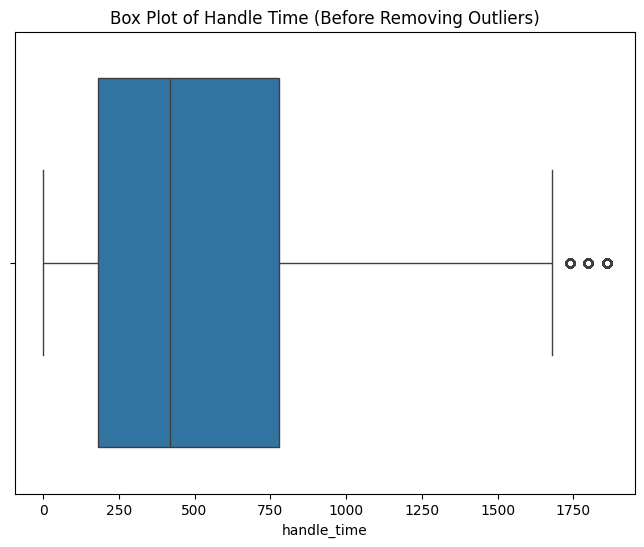

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


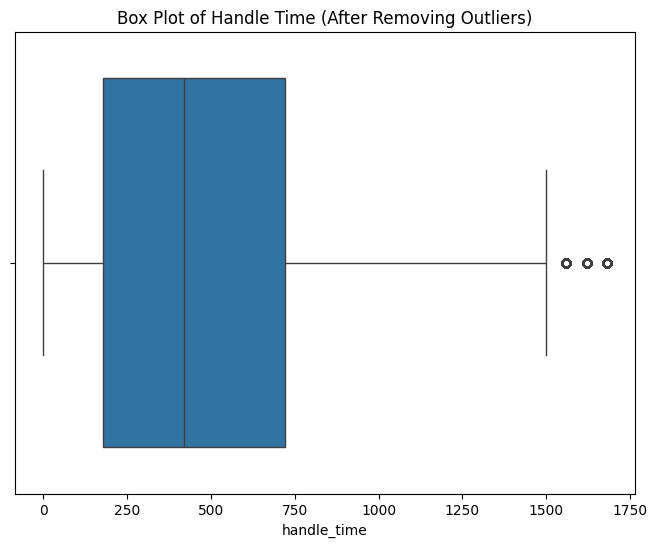

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Before removing outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=merged_df['handle_time'])
plt.title("Box Plot of Handle Time (Before Removing Outliers)")
plt.show()

# Removing outliers using IQR method
Q1 = merged_df['handle_time'].quantile(0.25)
Q3 = merged_df['handle_time'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Removing outliers
merged_df = merged_df[(merged_df['handle_time'] >= lower_bound) & (merged_df['handle_time'] <= upper_bound)]

# After removing outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=merged_df['handle_time'])
plt.title("Box Plot of Handle Time (After Removing Outliers)")
plt.show()

# Bar Plot: AHT by Call Reason


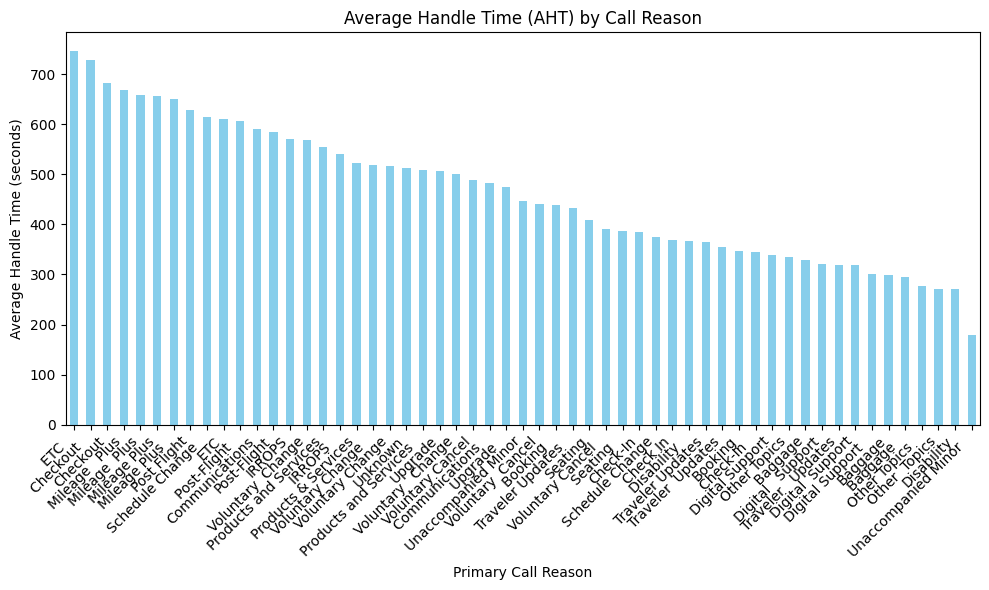

In [ ]:
aht_by_reason = merged_df.groupby('primary_call_reason')['handle_time'].mean().sort_values(ascending=False)

# Plot AHT by call reason
plt.figure(figsize=(10, 6))
aht_by_reason.plot(kind='bar', color='skyblue')
plt.title('Average Handle Time (AHT) by Call Reason')
plt.xlabel('Primary Call Reason')
plt.ylabel('Average Handle Time (seconds)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Box Plot: AHT by Customer Loyalty Status (Elite Level)


<ipython-input-39-a9da3f094a98>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='elite_level_code', y='handle_time', data=merged_df, palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 t

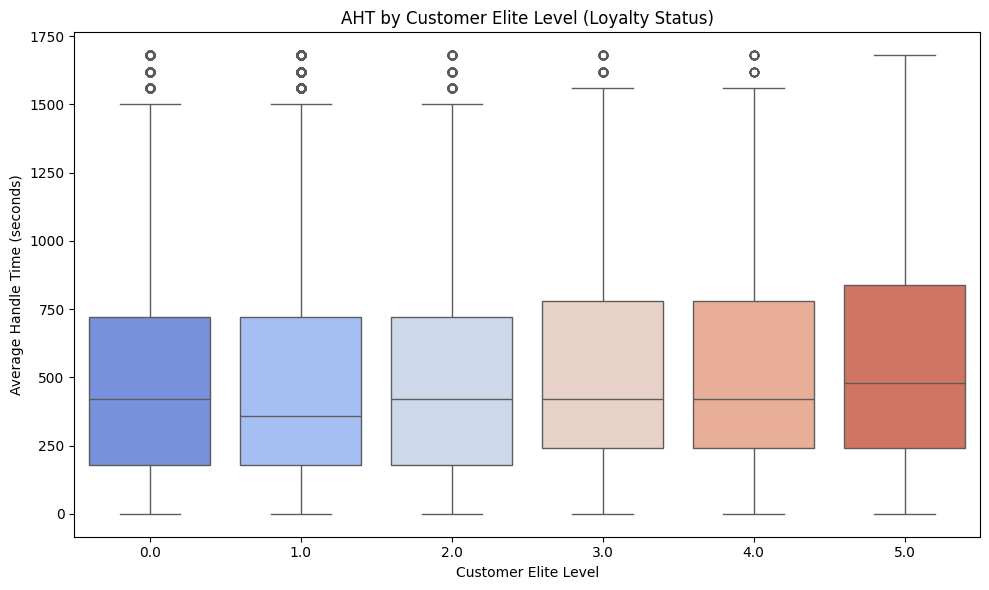

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='elite_level_code', y='handle_time', data=merged_df, palette='coolwarm')
plt.title('AHT by Customer Elite Level (Loyalty Status)')
plt.xlabel('Customer Elite Level')
plt.ylabel('Average Handle Time (seconds)')
plt.tight_layout()
plt.show()


# Heatmap: AHT by Agent and Customer Tone


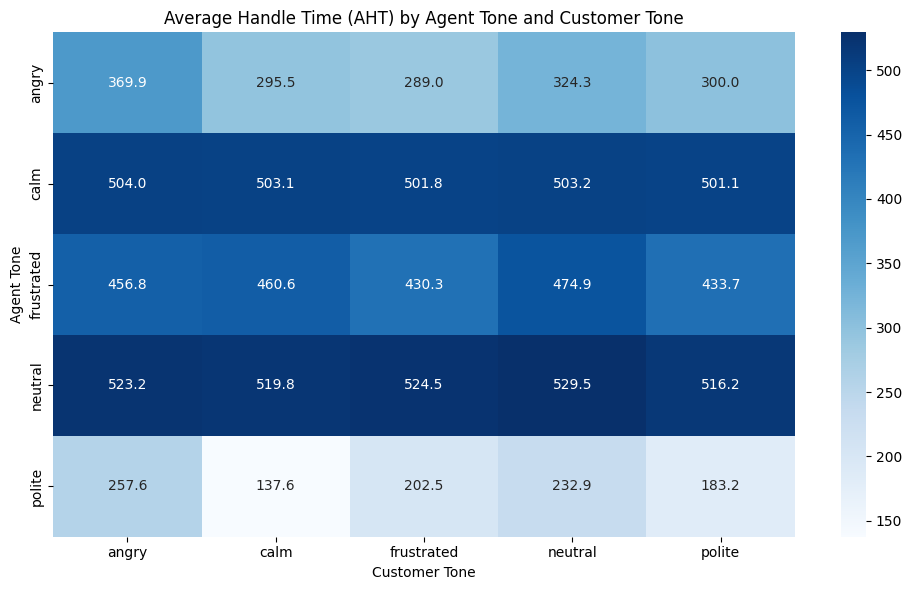

In [ ]:
# Group by agent and customer tone
aht_by_tone = merged_df.groupby(['agent_tone', 'customer_tone'])['handle_time'].mean().unstack()

# Heatmap of AHT by agent and customer tone
plt.figure(figsize=(10, 6))
sns.heatmap(aht_by_tone, cmap='Blues', annot=True, fmt=".1f")
plt.title('Average Handle Time (AHT) by Agent Tone and Customer Tone')
plt.xlabel('Customer Tone')
plt.ylabel('Agent Tone')
plt.tight_layout()
plt.show()


# Bar Plot: AST by Call Reason


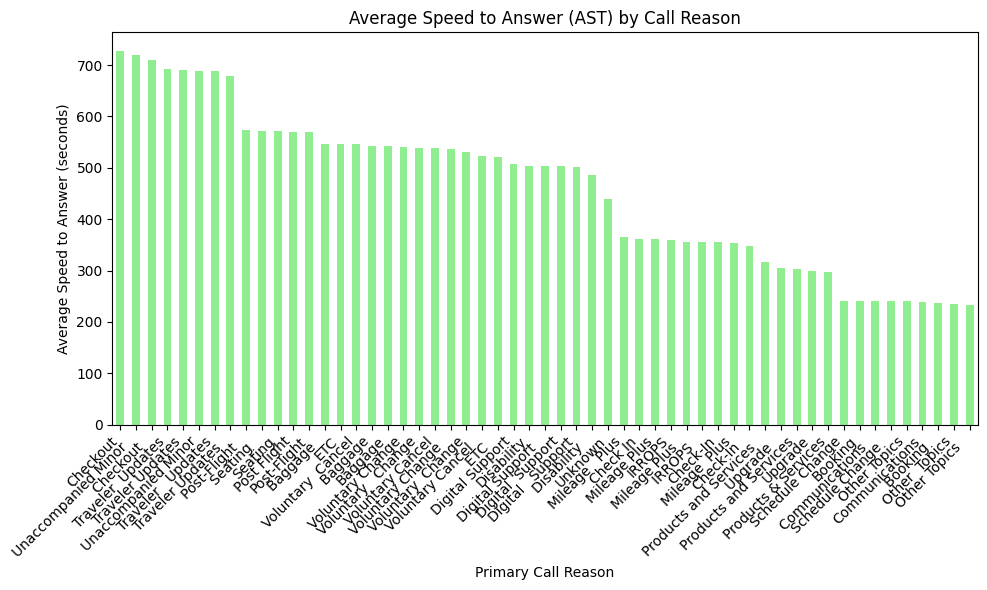

In [ ]:
# Group by call reason to calculate average AST
ast_by_reason = merged_df.groupby('primary_call_reason')['speed_to_answer'].mean().sort_values(ascending=False)

# Plot the results
import matplotlib.pyplot as plt

# Bar chart for AST by call reason
plt.figure(figsize=(10, 6))
ast_by_reason.plot(kind='bar', color='lightgreen')
plt.title('Average Speed to Answer (AST) by Call Reason')
plt.xlabel('Primary Call Reason')
plt.ylabel('Average Speed to Answer (seconds)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Heat Map: AST by Call Reason


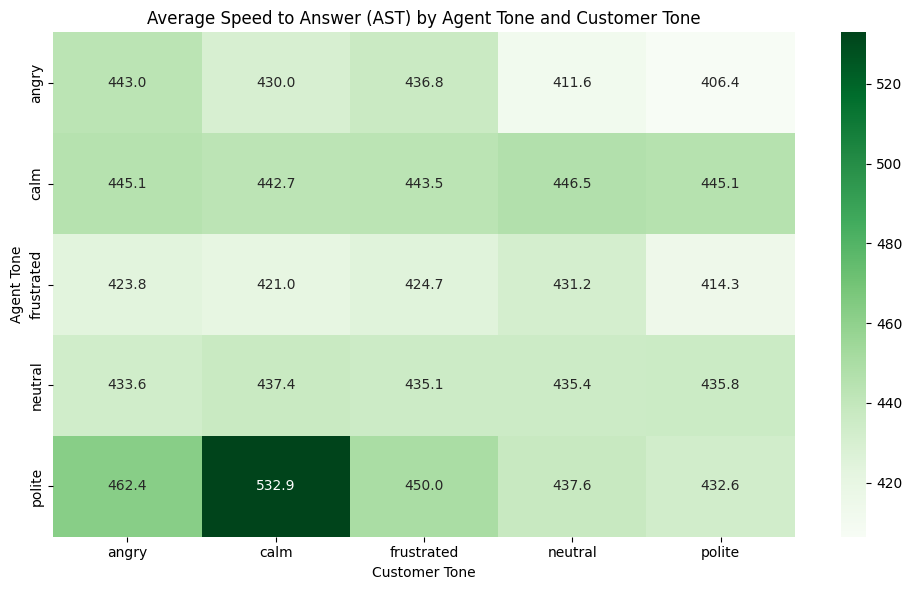

In [ ]:
# Group by agent and customer tone
ast_by_tone = merged_df.groupby(['agent_tone', 'customer_tone'])['speed_to_answer'].mean().unstack()


# Heatmap of AST by agent and customer tone
plt.figure(figsize=(10, 6))
sns.heatmap(ast_by_tone, cmap='Greens', annot=True, fmt=".1f")
plt.title('Average Speed to Answer (AST) by Agent Tone and Customer Tone')
plt.xlabel('Customer Tone')
plt.ylabel('Agent Tone')
plt.tight_layout()
plt.show()


## Percentage difference between AHT of most frequent and least frequent call reasons

In [ ]:
# Count the frequency of each call reason
reason_counts = merged_df['primary_call_reason'].value_counts()

# Get most and least frequent call reasons
most_frequent_reason = reason_counts.idxmax()
least_frequent_reason = reason_counts.idxmin()

# Calculate average AHT for these reasons
aht_most_frequent = merged_df[merged_df['primary_call_reason'] == most_frequent_reason]['handle_time'].mean()
aht_least_frequent = merged_df[merged_df['primary_call_reason'] == least_frequent_reason]['handle_time'].mean()

# Calculate percentage difference
percentage_difference = ((aht_most_frequent - aht_least_frequent) / aht_most_frequent) * 100

print(f"Percentage difference between AHT of most frequent and least frequent call reasons: {percentage_difference:.2f}%")


Percentage difference between AHT of most frequent and least frequent call reasons: 68.50%


# 5. Analysis of Key Drivers of Long AHT and AST


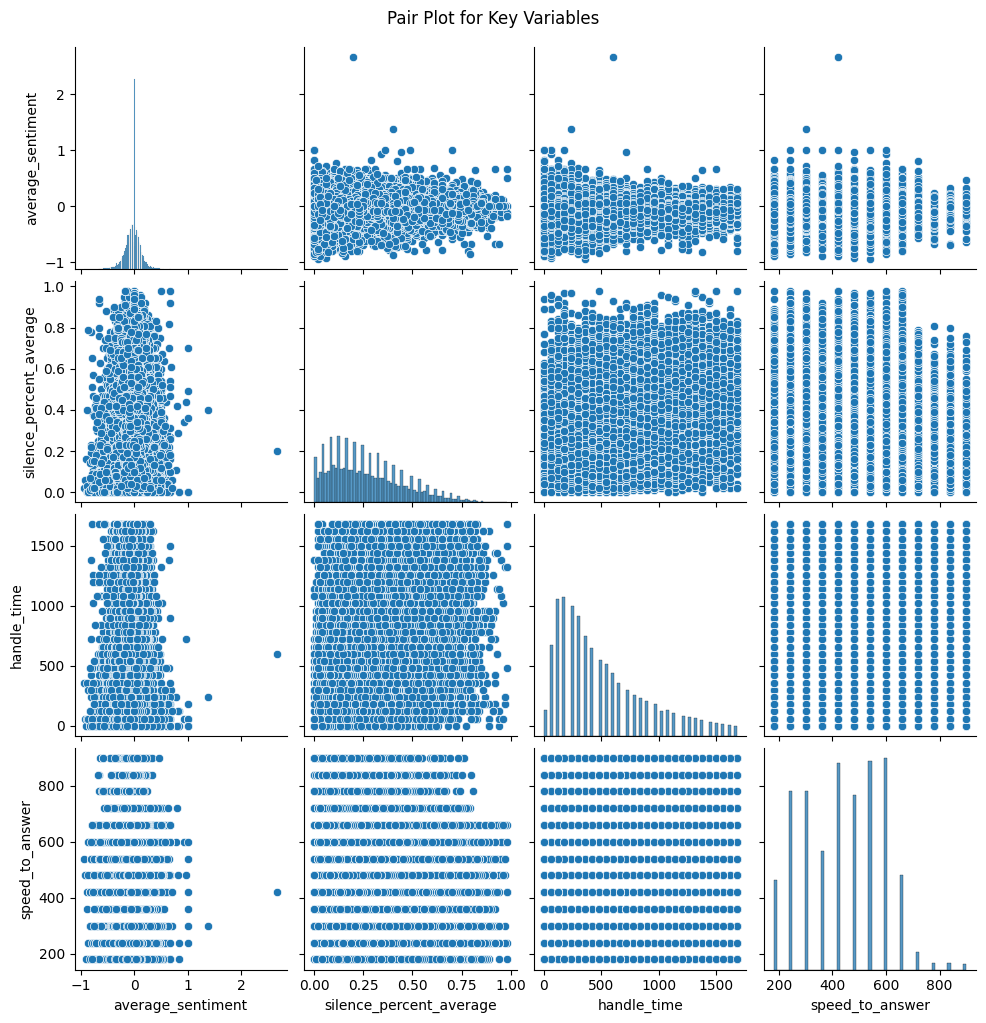

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the relevant numerical columns for analysis
# Assuming your columns are named 'handle_time' and 'speed_to_answer'
num_columns = ['average_sentiment', 'customer_tone', 'agent_tone', 'silence_percent_average', 'handle_time', 'speed_to_answer']

# Plot pairplot
sns.pairplot(merged_df[num_columns].dropna())
plt.suptitle('Pair Plot for Key Variables', y=1.02)
plt.show()


<ipython-input-57-6255a45ffff6>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='primary_call_reason', y='frequency', data=call_reason_freq, ax=ax, palette='Blues_d')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: Futu

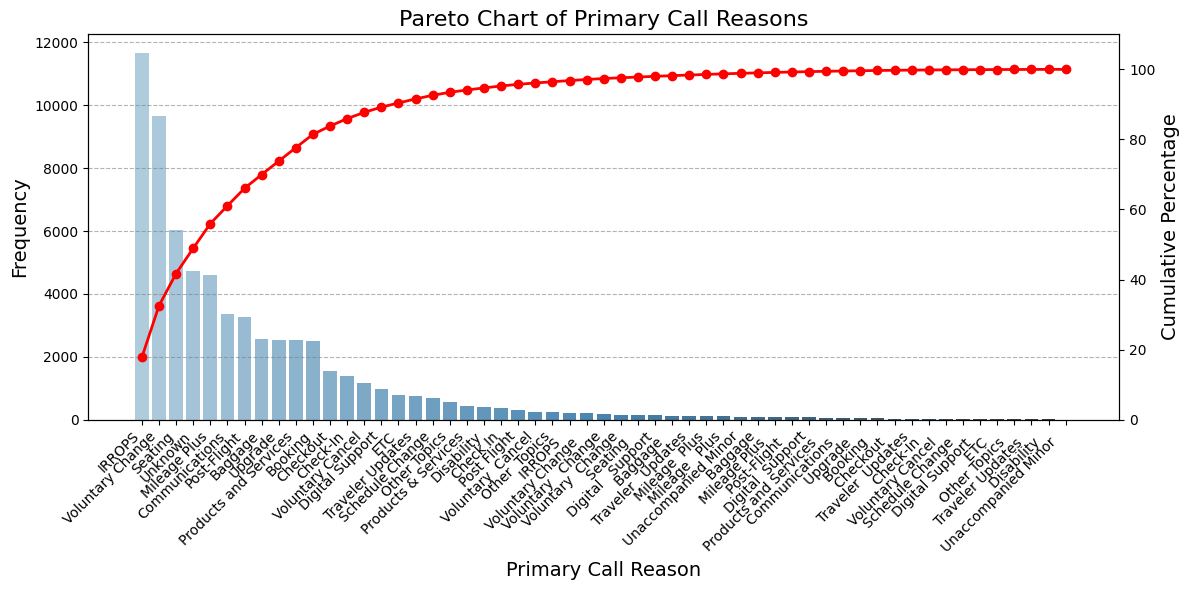

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# call_reason_freq should be your actual data after grouping
call_reason_freq = merged_df['primary_call_reason'].value_counts().reset_index()
call_reason_freq.columns = ['primary_call_reason', 'frequency']

# Calculate cumulative percentage
call_reason_freq['cumulative_percentage'] = call_reason_freq['frequency'].cumsum() / call_reason_freq['frequency'].sum() * 100

# Plotting the Pareto Chart
fig, ax = plt.subplots(figsize=(12, 6))

# Create a bar plot for the frequency of primary call reasons
sns.barplot(x='primary_call_reason', y='frequency', data=call_reason_freq, ax=ax, palette='Blues_d')

# Create a secondary y-axis for cumulative percentage
ax2 = ax.twinx()
ax2.plot(call_reason_freq['primary_call_reason'], call_reason_freq['cumulative_percentage'], color='red', marker='o', linestyle='-', linewidth=2)
ax2.set_ylim(0, 110)

# Set axis labels
ax.set_xlabel('Primary Call Reason', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
ax2.set_ylabel('Cumulative Percentage', fontsize=14)

# Set the title
plt.title('Pareto Chart of Primary Call Reasons', fontsize=16)

# Rotate x-ticks for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Display grid lines and format
ax.yaxis.grid(True, linestyle='--', which='both', color='gray', alpha=0.6)
ax2.yaxis.grid(False)

plt.tight_layout()
plt.show()


# Average Sentiment Score Grouped by Key Features


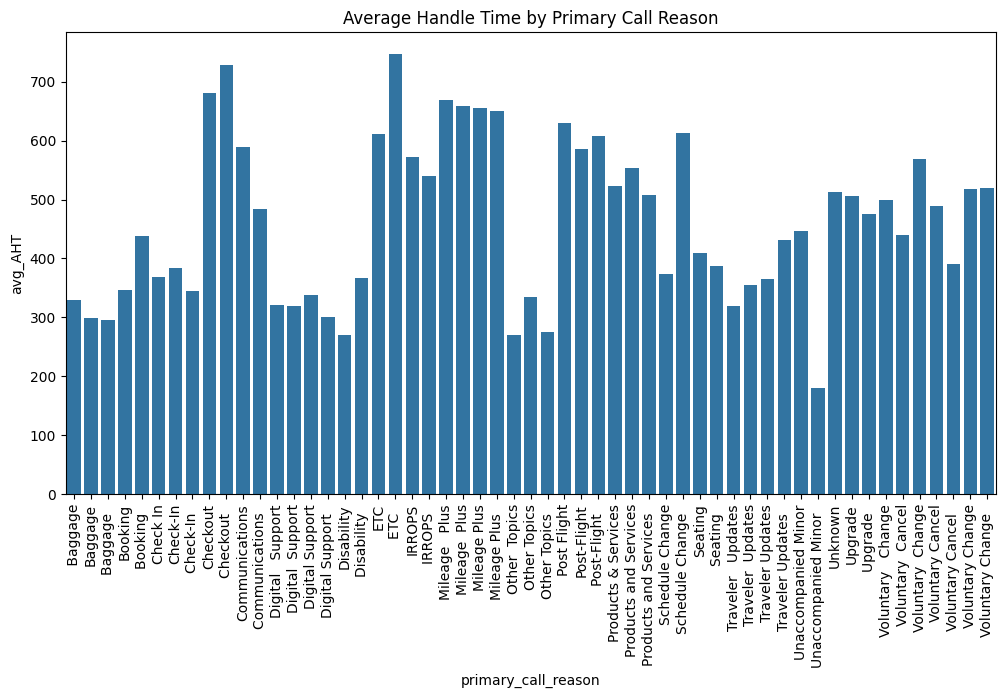

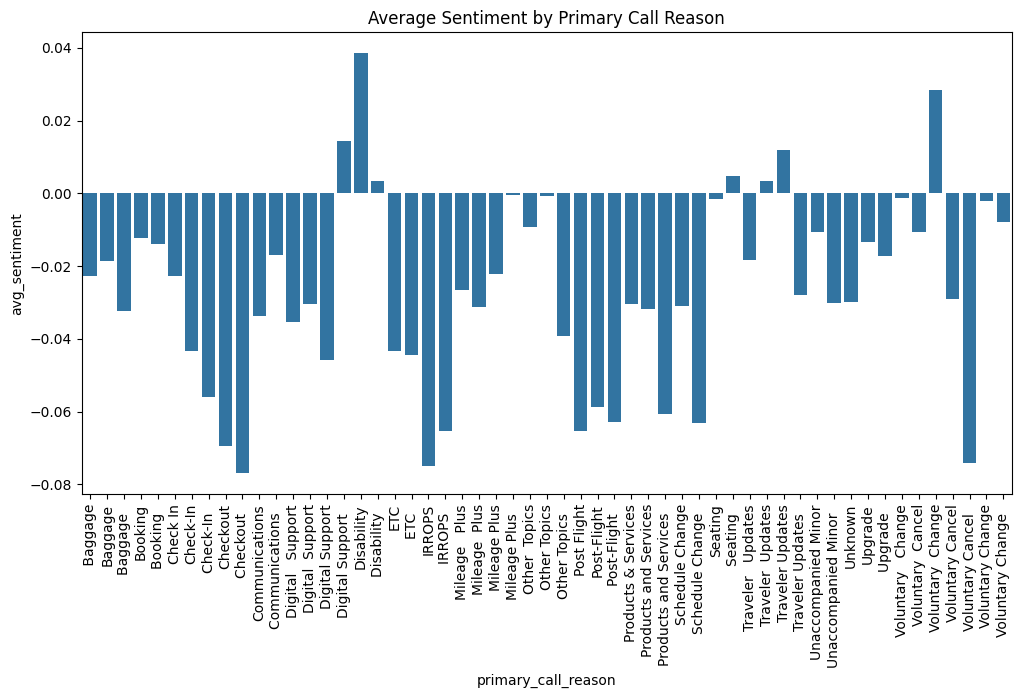

In [ ]:
# Average sentiment and AHT grouped by primary call reason
grouped_data = merged_df.groupby('primary_call_reason').agg(
    avg_sentiment=('average_sentiment', 'mean'),
    avg_AHT=('handle_time', 'mean'),
    avg_AST=('speed_to_answer', 'mean')
).reset_index()

# Plot grouped data
plt.figure(figsize=(12, 6))
sns.barplot(x='primary_call_reason', y='avg_AHT', data=grouped_data)
plt.xticks(rotation=90)
plt.title('Average Handle Time by Primary Call Reason')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='primary_call_reason', y='avg_sentiment', data=grouped_data)
plt.xticks(rotation=90)
plt.title('Average Sentiment by Primary Call Reason')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


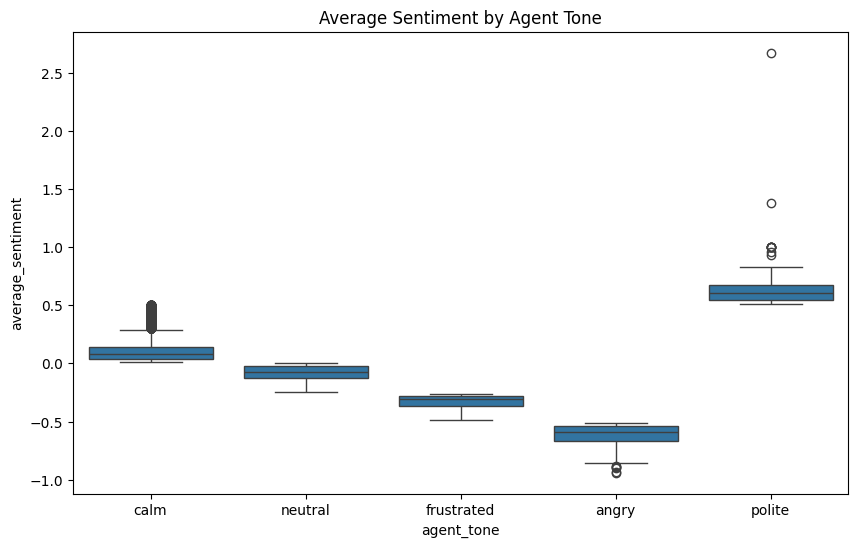

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


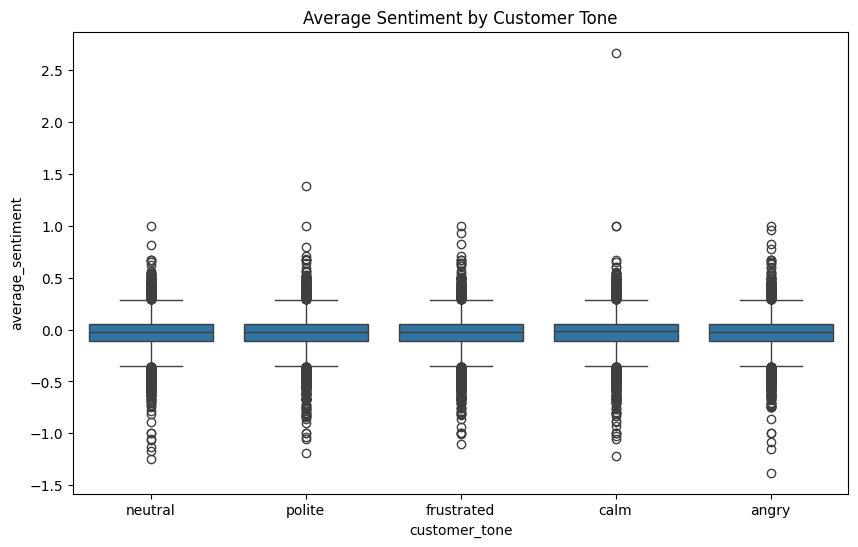

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='agent_tone', y='average_sentiment', data=merged_df)
plt.title('Average Sentiment by Agent Tone')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='customer_tone', y='average_sentiment', data=merged_df)
plt.title('Average Sentiment by Customer Tone')
plt.show()


<ipython-input-63-d9274a5562ba>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x='primary_call_reason', y='handle_time', palette="coolwarm")
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-

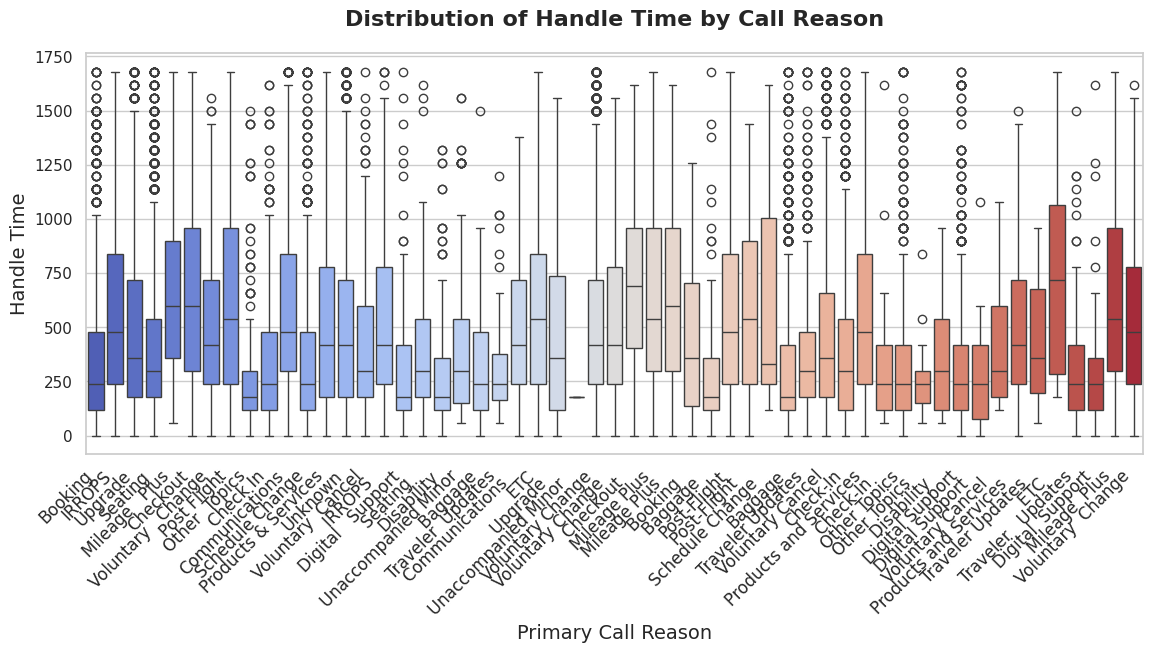

In [ ]:
# Distribution of handle time by call reason (Boxplot)
plt.figure(figsize=(12, 7))
sns.boxplot(data=merged_df, x='primary_call_reason', y='handle_time', palette="coolwarm")
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.xlabel("Primary Call Reason", fontsize=14)
plt.ylabel("Handle Time", fontsize=14)
plt.title("Distribution of Handle Time by Call Reason", fontsize=16, weight='bold', pad=20)
plt.tight_layout(pad=2)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

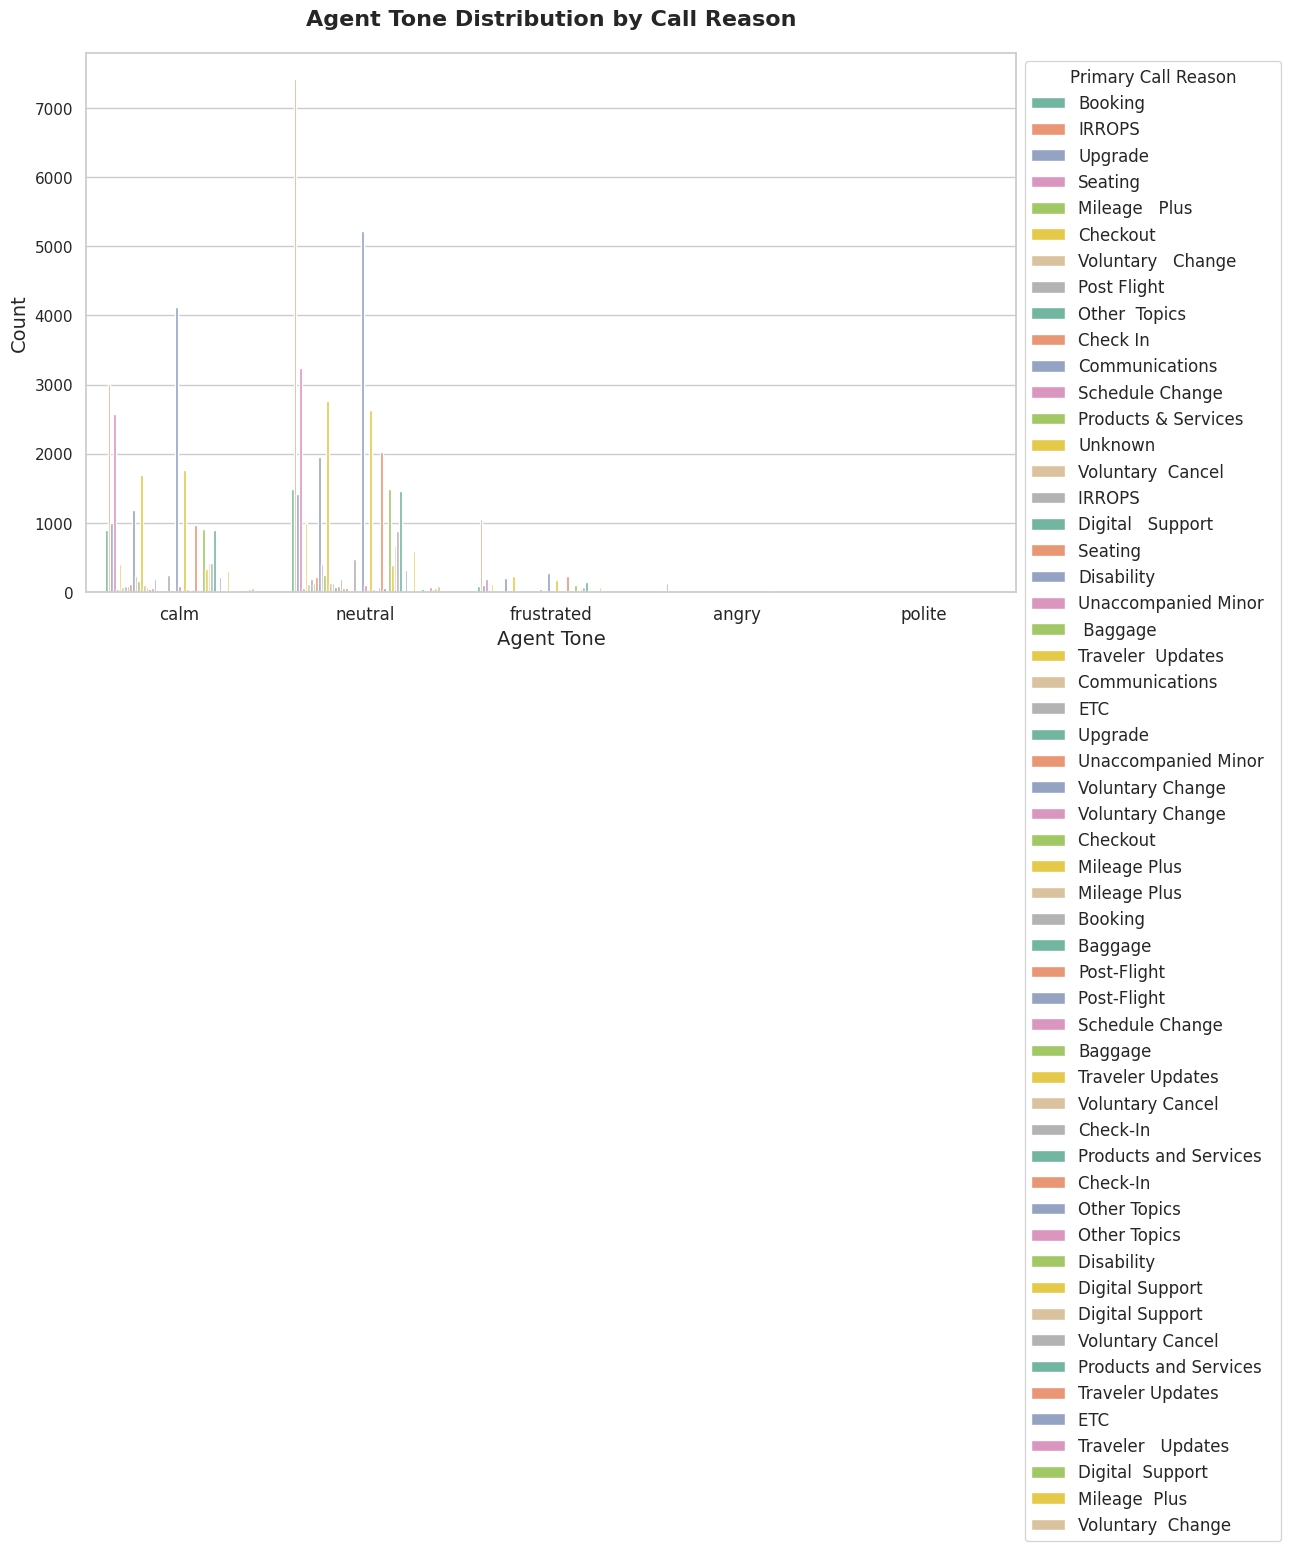

In [ ]:
# Tone impact analysis (Countplot)
plt.figure(figsize=(12, 7))
sns.countplot(data=merged_df, x='agent_tone', hue='primary_call_reason', palette="Set2")
plt.xticks(fontsize=12)
plt.xlabel("Agent Tone", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Agent Tone Distribution by Call Reason", fontsize=16, weight='bold', pad=20)
plt.legend(title="Primary Call Reason", bbox_to_anchor=(1, 1), loc="upper left", fontsize=12)
plt.tight_layout(pad=2)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

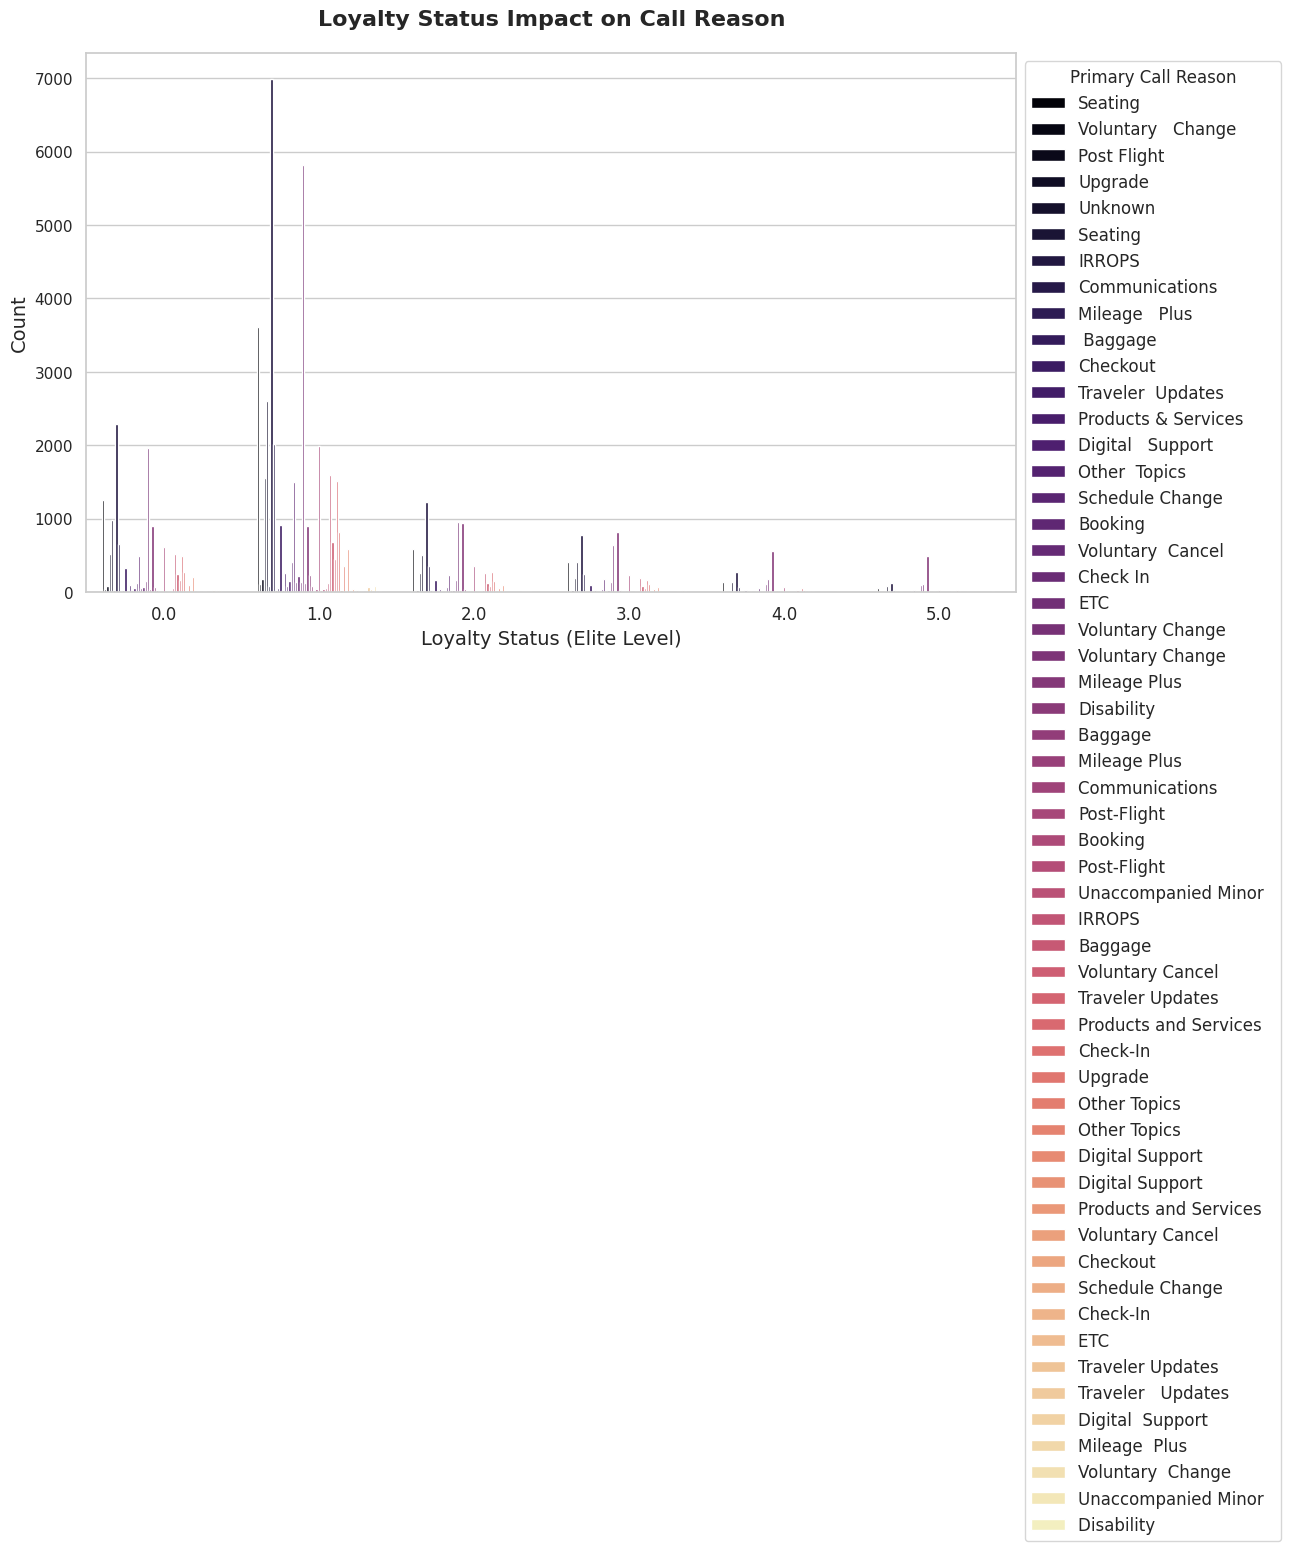

In [ ]:

# Loyalty status and call reason (Countplot)
plt.figure(figsize=(12, 7))
sns.countplot(data=merged_df, x='elite_level_code', hue='primary_call_reason', palette="magma")
plt.xticks(fontsize=12)
plt.xlabel("Loyalty Status (Elite Level)", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Loyalty Status Impact on Call Reason", fontsize=16, weight='bold', pad=20)
plt.legend(title="Primary Call Reason", bbox_to_anchor=(1, 1), loc="upper left", fontsize=12)
plt.tight_layout(pad=2)
plt.show()
